# Time-Varying Bayesian Linear Regression

*You are seeing the
notebook output generated by
[Literate.jl](https://github.com/fredrikekre/Literate.jl) from the
[Julia source file](https://github.com/JuliaGaussianProcesses/Stheno.jl/blob/master/examples/time_varying_blr/script.jl).
The rendered HTML can be viewed [in the docs](https://juliagaussianprocesses.github.io/KernelFunctions.jl/dev/examples/time_varying_blr/).*

In [1]:
using AbstractGPs
using ColorTypes
using FixedPointNumbers
using Plots
using Random
using Stheno

## Define and inspect our model

g1 and g2 are time-varying basis functions. In a real application, these might be specified
by data.

w1 and w2 are the time-varying basis functions for these bases, specified by slowly
varying GPs.

f is the prediction of the regressor.

y is the addition of f and rough temporally-correlated "noise".

In [2]:
f = @gppp let
    g1 = x->x / 4
    g2 = cos
    w1 = stretch(GP(SEKernel()), 0.2)
    w2 = stretch(GP(SEKernel()), 1)
    f = g1 * w1 + g2 * w2
    y = f + 0.3 * GP(Matern12Kernel())
end;

Sample from the prior from plotting and for conditioning.

In [3]:
rng, N, Nplot, S = MersenneTwister(123456), 250, 500, 100;
x = GPPPInput(:y, sort(rand(rng, N) * 10));
ŷ = rand(rng, f(x));

Compute the posterior.

In [4]:
f′ = posterior(f(x), ŷ);

Sample from the posterior and write to file.

In [5]:
xp_ = range(-2.5, stop=12.5, length=Nplot);
xp_w1 = GPPPInput(:w1, xp_);
xp_w2 = GPPPInput(:w2, xp_);
xp_y = GPPPInput(:y, xp_);

Generate joint posterior samples.

In [6]:
xp = BlockData(xp_w1, xp_w2, xp_y);
f′_xp = rand(rng, f′(xp, 1e-9), S);
w1′s, w2′s, y′s = split(xp, f′_xp);

## Plot results

In [7]:
gr();
posterior_plot = plot(
    legend=:topleft,
    legendfont=Plots.Font(
        "sans-serif",
        10,
        :hcenter,
        :vcenter,
        0.0,
        RGB{Normed{UInt8, 8}}(0.0,0.0,0.0)
    ),
    background_color_legend=RGBA(1, 1, 1, 0),
    foreground_color_legend=RGBA(1, 1, 1, 0),
);

Plot posterior over w1.

In [8]:
plot!(posterior_plot, xp_, f′(xp_w1); color=:green, label="w1");
plot!(posterior_plot, xp_, w1′s; color=:green, label="", linewidth=1, alpha=0.2);

Plot posterior over w2.

In [9]:
plot!(posterior_plot, xp_, f′(xp_w2); color=:magenta, label="w2");
plot!(posterior_plot, xp_, w2′s; color=:magenta, label="", linewidth=1, alpha=0.2);

Plot x1 and x2

In [10]:
plot!(posterior_plot, xp_, (x->x / 4).(xp_);
    linecolor=:black,
    linewidth=1.0,
    label="x / 4",
);
plot!(posterior_plot, xp_, cos.(xp_);
    linecolor=:black,
    linewidth=1.0,
    linestyle=:dash,
    label="cos",
);

Plot samples against which we're regressing.

In [11]:
scatter!(posterior_plot, x.x, ŷ;
    markercolor=:red,
    markershape=:circle,
    markerstrokewidth=0.0,
    markersize=4,
    markeralpha=0.7,
    label="",
);

Plot posterior over `y`.

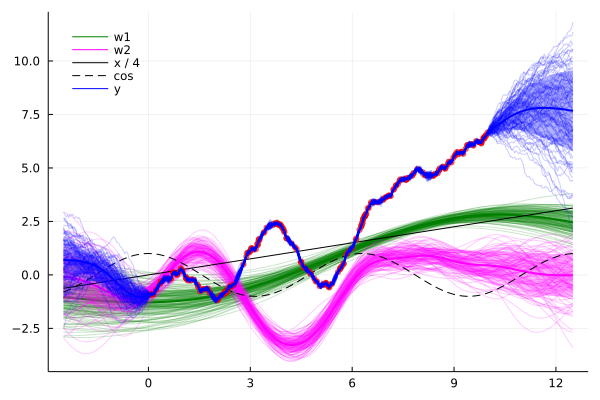

In [12]:
plot!(posterior_plot, xp_, f′(xp_y); color=:blue, label="y");
plot!(posterior_plot, xp_, y′s; color=:blue, label="", linewidth=1, alpha=0.2);

posterior_plot

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*